# Notebook Demonstrating how to Look Up Pan-STARRS1 Sources in the SDSS Archival X-Match Table, and subsequently Download and View SDSS Spectra

#### <span style='background : indigo'> To run the table lookup function, you'll need to have the [pyarrow](https://arrow.apache.org/docs/python/index.html) python package installed.</span>

The **sdss_archival_xmatch.parquet** file contains a table of all archival (DR18 and prior) SDSS spectra that are in areas of the sky covered by the ZTF reference image footprint (about 5 million spectra total). This table is basically just the standard [SDSS SpecObj](https://data.sdss.org/datamodel/files/SPECTRO_REDUX/specObj.html) table, cross matched with all of the Pan-STARRS1 (PS1) sources for which we have ZTF forced photometry light curves. Each row in this table corresponds to a unique spectrum, identified by its **specobjid** value. For each specobjid, the nearest PS1 source is identified, along with its separation in arcseconds from the SDSS RA+Dec coordinates of the source. This table also includes cross-matches with other catalogs, namely the [SDSS-V Multi-Object Spectroscopy (MOS) targeting catalog](https://www.sdss.org/dr18/targeting/), the Gaia DR3 source catalog, and the [Gentile Fusillo et al. 2021 Gaia White Dwarf Catalog](https://ui.adsabs.harvard.edu/abs/2021MNRAS.508.3877G/abstract). For the Gaia DR3 cross-match, entries are only included for rows if there was a match within 30-arcsec of the SDSS coordinates, and for the Gaia-White Dwarf cross-match, entries are only included for matches within 5-arcsec.

 The **sdss_archival_xmatch.parquet** file is too large to store on Github (approx. 400 Mb), but lives on the schoty machine in Cahill at <span style='background : indigo'>/scr/zvanderbosch/data/SDSS/catalogs/.</span>

In [1]:
import sys
import time
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import display, Markdown
from astropy.visualization import PercentileInterval

sys.path.insert(1, '../')
import sdss_tools as sdss

# Define the PS1 ID you want to check, and a Separation Tolerance

In [2]:
sep = 2.0 # arcseconds
psids = 113091424635045380

# Perform the Table Lookup
The lookup function returns all rows from the sdss_archival_xmatch table that match your PS1 ID in the form of a Pandas DataFrame.

In [3]:
TABLE_DIR = "/home/zachvanderbosch/data/object/SDSS/xmatch/data"
DEFAULT_TABLE = f"{TABLE_DIR}/sdss_archival_xmatch.parquet"

t0 = time.time()
df_matched = sdss.match_PS1_sources_to_SDSS(
    psids, 
    sep_tol=sep,
    table_name=DEFAULT_TABLE
)
t1 = time.time()
td = t1-t0

# Print out Results
Nentry = len(df_matched)
Nsource = len(df_matched.nearest_psid.unique())
print(f'\nResponse time: {td:.2f} s')
print(f'Returned {Nentry} Spectra for {Nsource} unique source(s)\n')
display(Markdown(df_matched.head(10).to_markdown()))


Response time: 1.61 s
Returned 6 Spectra for 1 unique source(s)



|    |   specobjid |      ra |    dec | programname   | survey   | objtype   | class   | subclass   |   plate |   mjd |   fiberid |   spec_dr | spec_url                                                                                                             |   ps1_sep |       nearest_psid |   psid_count |   mos_sep |   nearest_mos_catalogid |   gaia_sep | nearest_gaiaDR3_designation   |   gaiawd_sep | nearest_gaiawd         |
|---:|------------:|--------:|-------:|:--------------|:---------|:----------|:--------|:-----------|--------:|------:|----------:|----------:|:---------------------------------------------------------------------------------------------------------------------|----------:|-------------------:|-------------:|----------:|------------------------:|-----------:|:------------------------------|-------------:|:-----------------------|
|  0 | 1.71925e+19 | 142.463 | 4.2458 | eFEDS3        | bhm-mwm  | QSO       | STAR    | WDhotter   |   15270 | 59284 |        21 |        18 | https://dr18.sdss.org/sas/dr18/spectro/boss/redux/v6_0_4/spectra/full/15270p/59284/spec-15270-59284-04592708796.fits | 0.0934604 | 113091424635045380 |            6 | 0.0877904 |       27021598149877074 |   0.081111 | Gaia DR3 3851754124483964160  |    0.0811106 | WDJ092951.25+041444.85 |
|  1 | 1.71869e+19 | 142.463 | 4.2458 | eFEDS3        | bhm-mwm  | QSO       | STAR    | WDhotter   |   15265 | 59292 |       226 |        18 | https://dr18.sdss.org/sas/dr18/spectro/boss/redux/v6_0_4/spectra/full/15265p/59292/spec-15265-59292-04592708796.fits | 0.0934604 | 113091424635045380 |            6 | 0.0877904 |       27021598149877074 |   0.081111 | Gaia DR3 3851754124483964160  |    0.0811106 | WDJ092951.25+041444.85 |
|  2 | 1.71881e+19 | 142.463 | 4.2458 | eFEDS3        | bhm-mwm  | QSO       | STAR    | WDhotter   |   15266 | 59306 |       320 |        18 | https://dr18.sdss.org/sas/dr18/spectro/boss/redux/v6_0_4/spectra/full/15266p/59306/spec-15266-59306-04592708796.fits | 0.0934604 | 113091424635045380 |            6 | 0.0877904 |       27021598149877074 |   0.081111 | Gaia DR3 3851754124483964160  |    0.0811106 | WDJ092951.25+041444.85 |
|  3 | 1.71869e+19 | 142.463 | 4.2458 | eFEDS3        | bhm-mwm  | QSO       | STAR    | WDhotter   |   15265 | 59316 |       274 |        18 | https://dr18.sdss.org/sas/dr18/spectro/boss/redux/v6_0_4/spectra/full/15265p/59316/spec-15265-59316-04592708796.fits | 0.0934604 | 113091424635045380 |            6 | 0.0877904 |       27021598149877074 |   0.081111 | Gaia DR3 3851754124483964160  |    0.0811106 | WDJ092951.25+041444.85 |
|  4 | 1.71926e+19 | 142.463 | 4.2458 | eFEDS3        | bhm-mwm  | QSO       | STAR    | WDhotter   |   15270 | 59317 |       465 |        18 | https://dr18.sdss.org/sas/dr18/spectro/boss/redux/v6_0_4/spectra/full/15270p/59317/spec-15270-59317-04592708796.fits | 0.0934604 | 113091424635045380 |            6 | 0.0877904 |       27021598149877074 |   0.081111 | Gaia DR3 3851754124483964160  |    0.0811106 | WDJ092951.25+041444.85 |
|  5 | 1.71881e+19 | 142.463 | 4.2458 | eFEDS3        | bhm-mwm  | QSO       | STAR    | WDhotter   |   15266 | 59345 |       420 |        18 | https://dr18.sdss.org/sas/dr18/spectro/boss/redux/v6_0_4/spectra/full/15266p/59345/spec-15266-59345-04592708796.fits | 0.0934604 | 113091424635045380 |            6 | 0.0877904 |       27021598149877074 |   0.081111 | Gaia DR3 3851754124483964160  |    0.0811106 | WDJ092951.25+041444.85 |

# The Pan-STARRS IDs to Check can also be a large list
The following starlist file is a list of all PS1 sources within the *g*-band reference image for ZTF Field 466, CCD 4, Quadrant 3. This is about 15,000 sources.

In [4]:
starlist_file =  "../data/ztf_000466_zg_c04_q3_starlist.txt"

starlist = pd.read_csv(
    starlist_file, 
    header=None, 
    names=['psid','ra','dec','x','y'], 
    delim_whitespace=True
)

starlist_psids = starlist.psid.values
Nstars = len(starlist_psids)
print(f"{Nstars} sources in starlist file.")

15044 sources in starlist file.


# Perform Table Lookup Again
As you'll see below, even for large lists of Pan-STARRS1 IDs, the table lookup takes essentially the same time as it does for single objects. That's thanks to the pyarrow package, which <span style=' background : indigo'>allows filters to be applied to the parquet file as it's being read</span>.  In this case, the filters are simply that a source must be in the supplied list of PS1 IDs, and be within the on-sky separation limit. The lookup function again returns all rows from the sdss_archival_xmatch table in the form of a Pandas DataFrame.

In [5]:
t0 = time.time()
df_matched = sdss.match_PS1_sources_to_SDSS(
    starlist_psids, 
    sep_tol=sep,
    table_name=DEFAULT_TABLE
)
t1 = time.time()
td = t1-t0

# Print out Results
Nentry = len(df_matched)
Nsource = len(df_matched.nearest_psid.unique())
print(f'\nResponse time: {td:.2f} s')
print(f'Returned {Nentry} Spectra for {Nsource} unique source(s)\n')
display(Markdown(df_matched.head(5).to_markdown()))


Response time: 0.81 s
Returned 533 Spectra for 477 unique source(s)



|    |   specobjid |      ra |      dec | programname   | survey   | objtype   | class   | subclass       |   plate |   mjd |   fiberid |   spec_dr | spec_url                                                                                                             |    ps1_sep |       nearest_psid |   psid_count |     mos_sep |   nearest_mos_catalogid |   gaia_sep | nearest_gaiaDR3_designation   |   gaiawd_sep | nearest_gaiawd   |
|---:|------------:|--------:|---------:|:--------------|:---------|:----------|:--------|:---------------|--------:|------:|----------:|----------:|:---------------------------------------------------------------------------------------------------------------------|-----------:|-------------------:|-------------:|------------:|------------------------:|-----------:|:------------------------------|-------------:|:-----------------|
|  0 | 1.41111e+19 | 133.872 | 0.799241 | eFEDS         | eboss    | STD       | STAR    | F3/F5V (30743) |   12533 | 58931 |       643 |        17 | https://data.sdss.org/sas/dr17/eboss/spectro/redux/v5_13_2/spectra/full/12533/spec-12533-58931-0643.fits             | 0.00599019 | 108951338723099530 |            1 |  0.00350662 |       27021598102728575 |   0.005581 | Gaia DR3 3074759979036699136  |          nan | <NA>             |
|  1 | 5.2811e+17  | 133.949 | 0.794283 | legacy        | sdss     | GALAXY    | GALAXY  | AGN BROADLINE  |     469 | 51913 |       230 |        17 | https://data.sdss.org/sas/dr17/sdss/spectro/redux/26/spectra/0469/spec-0469-51913-0230.fits                          | 0.0573531  | 108951339485963609 |            2 |  0.219623   |       27021598102728604 |   0.051471 | Gaia DR3 3074760494431842944  |          nan | <NA>             |
|  2 | 1.70766e+19 | 133.949 | 0.794259 | eFEDS2        | bhm-mwm  | QSO       | GALAXY  | AGN BROADLINE  |   15167 | 59252 |       252 |        18 | https://dr18.sdss.org/sas/dr18/spectro/boss/redux/v6_0_4/spectra/full/15167p/59252/spec-15167-59252-06747852944.fits | 0.185712   | 108951339485963609 |            2 |  0.0558107  |       27021598102728604 |   0.164055 | Gaia DR3 3074760494431842944  |          nan | <NA>             |
|  3 | 1.70563e+19 | 134.045 | 0.797077 | eFEDS1        | bhm-mwm  | QSO       | GALAXY  |                |   15149 | 59231 |       254 |        18 | https://dr18.sdss.org/sas/dr18/spectro/boss/redux/v6_0_4/spectra/full/15149p/59231/spec-15149-59231-06747853934.fits | 0.0144741  | 108951340445496929 |            1 |  0.00181287 |       27021600031676864 |   0.032145 | Gaia DR3 3074757780013758720  |          nan | <NA>             |
|  4 | 5.28098e+17 | 134.468 | 0.798541 | legacy        | sdss     | GALAXY    | GALAXY  | STARFORMING    |     469 | 51913 |       187 |        17 | https://data.sdss.org/sas/dr17/sdss/spectro/redux/26/spectra/0469/spec-0469-51913-0187.fits                          | 0.0806911  | 108951344675348709 |            1 | 27.2489     |       27021598102735040 |  17.1756   | Gaia DR3 576751435690433536   |          nan | <NA>             |

# Download and View Spectra
As you can see in the above table, URLs are included that you can use to directly download the data. A convenience function in sdss_tools is provided for this purpose. Just give it a URL, and you get the spectral data in return as a dictionary with the following entries:

* **wavelength**: Wavelength in angstroms
* **flux**: Flux density in 10^16 erg/s/cm^2/A
* **e_flux**: Flux density uncertainty in same units as **flux**
* **fsky**: Sky flux in same units as **flux**
* **header**: The full header, in case you desire extra metadata.

/home/zachvanderbosch/github/StellarTools/Spectroscopy/SDSS/notebooks/../sdss_tools.py:596: RuntimeWarning: divide by zero encountered in divide
  eflux = np.sqrt(1./ivar)


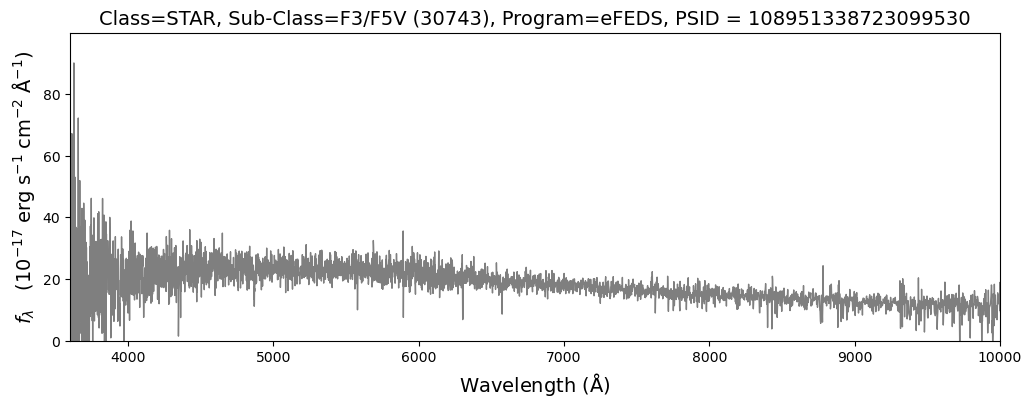

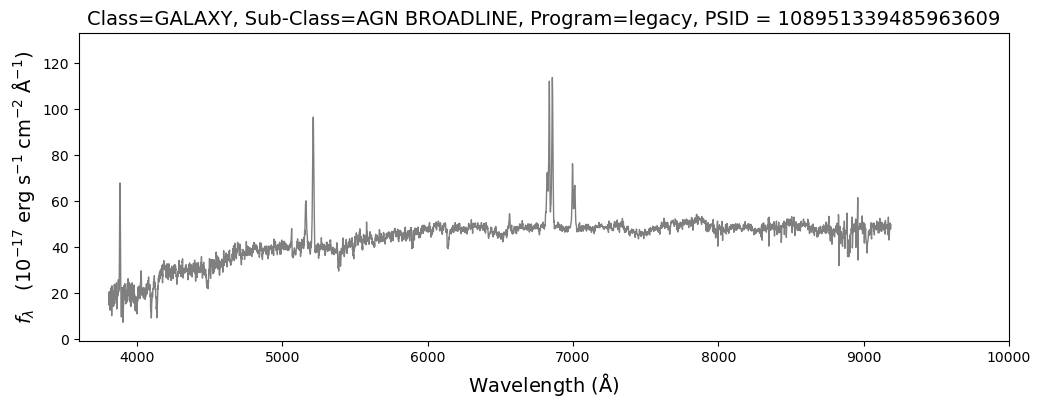

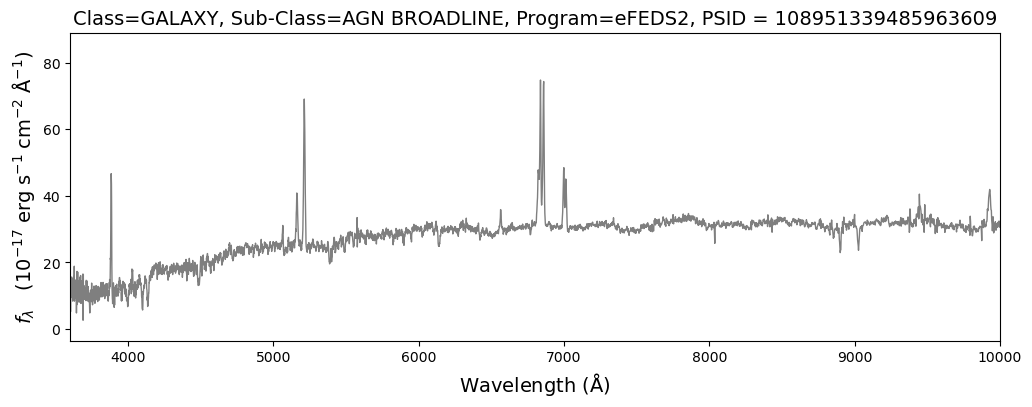

In [6]:
for idx in range(3):
    
    obj_url = df_matched.spec_url.iloc[idx]
    spec_data = sdss.get_SDSS_spectrum(obj_url)
    
    if spec_data is not None:
    
        # Get object metadata
        obj_class = df_matched['class'].iloc[idx]
        obj_subclass = df_matched['subclass'].iloc[idx]
        obj_program = df_matched['programname'].iloc[idx]
        obj_psid = df_matched.nearest_psid.iloc[idx]
        pmatch = f"PSID = {obj_psid}"
        
        
    
        fig = plt.figure(figsize=(12,4))
        ax = fig.add_subplot(111)
        
        ax.plot(
            spec_data['wavelength'], 
            spec_data['flux'], 
            ls='-',lw=1,c='C7'
        )
    
        ptitle = f"Class={obj_class}, Sub-Class={obj_subclass}, Program={obj_program}, {pmatch}"
        ax.set_title(ptitle, fontsize=14)
        ax.set_xlabel('Wavelength ($\mathrm{\AA}$)',fontsize=14)
        ax.set_ylabel('$f_{\lambda}$   ($10^{-17}$ $\mathrm{erg\;s^{-1}\;cm^{-2}\;\AA^{-1}}$)',fontsize=14)
        
        # Set XY limits
        PI = PercentileInterval(99.9)
        flux_limits = PI.get_limits(spec_data['flux'])
        flux_range = flux_limits[1] - flux_limits[0]
        if flux_limits[0] < 0:
            ylow = 0.0
        else:
            ylow = flux_limits[0]-0.10*flux_range
        yupp = flux_limits[1]+0.25*flux_range
        ax.set_xlim(3600,10000)
        ax.set_ylim(ylow, yupp)

        plt.show()
        plt.close()
    else:
        print('No spectral data returned.')